# Explore here

## Step 1: Problem statement and data collection

Problem statement: Based on other known features about a customer, use ML to determine whether that customer will take out a long-term deposit or not (categorical)

In [73]:
# Import dataset to start working with it
import pandas as pd

raw_data = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", sep=";")

## Step 2: Exploration and data cleaning

In [74]:
print(f"Raw data shape: {raw_data.shape}")
print(raw_data.info())

Raw data shape: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  con

Unlike prior exercise, doesn't look as though any of our columns have missing data at all, which simplifies matters.

I don't see a column for ID in here.  The rest of the data points seemed generic enough that at first it was plausible to me we'd have multiple identical-seeming rows sourced from separate actual people, but then upon talking with a classmate it reminded me that we have at least one very-granular item (duration of last call in seconds) unlikely to be replicated across otherwise-wholly-identical rows representing different people. so doing a simple drop_duplicates() makes sense to me.

In [75]:
raw_data.drop_duplicates(inplace=True)


print(raw_data.shape)
raw_data.head()

(41176, 21)


age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [76]:
# remove data considered irrelevant
# raw_data.drop(
#    ["id", "name", "host_name", "last_review", "reviews_per_month"],
#    axis=1,
#    inplace=True,
# )
# skipping this because as of yet, none of the columns in the raw dataset look strictly-irrelevant to me


raw_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Step 3: Analysis of univariate variables
### categorical variables
Categorical, non-numeric variables in this dataframe include: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

All of these are plausible to me as relevant.

In [77]:
categorical_variables = [
    "job",
    "marital",
    "education",
    "default",
    "housing",
    "loan",
    "contact",
    "month",
    "day_of_week",
    "poutcome",
]

for each_categorical_variable in categorical_variables:
    print(f"\n\t{each_categorical_variable}s:")
    for each_possible_value in sorted(
        raw_data[f"{each_categorical_variable}"].unique()
    ):
        print(each_possible_value)


	jobs:
admin.
blue-collar
entrepreneur
housemaid
management
retired
self-employed
services
student
technician
unemployed
unknown

	maritals:
divorced
married
single
unknown

	educations:
basic.4y
basic.6y
basic.9y
high.school
illiterate
professional.course
university.degree
unknown

	defaults:
no
unknown
yes

	housings:
no
unknown
yes

	loans:
no
unknown
yes

	contacts:
cellular
telephone

	months:
apr
aug
dec
jul
jun
mar
may
nov
oct
sep

	day_of_weeks:
fri
mon
thu
tue
wed

	poutcomes:
failure
nonexistent
success


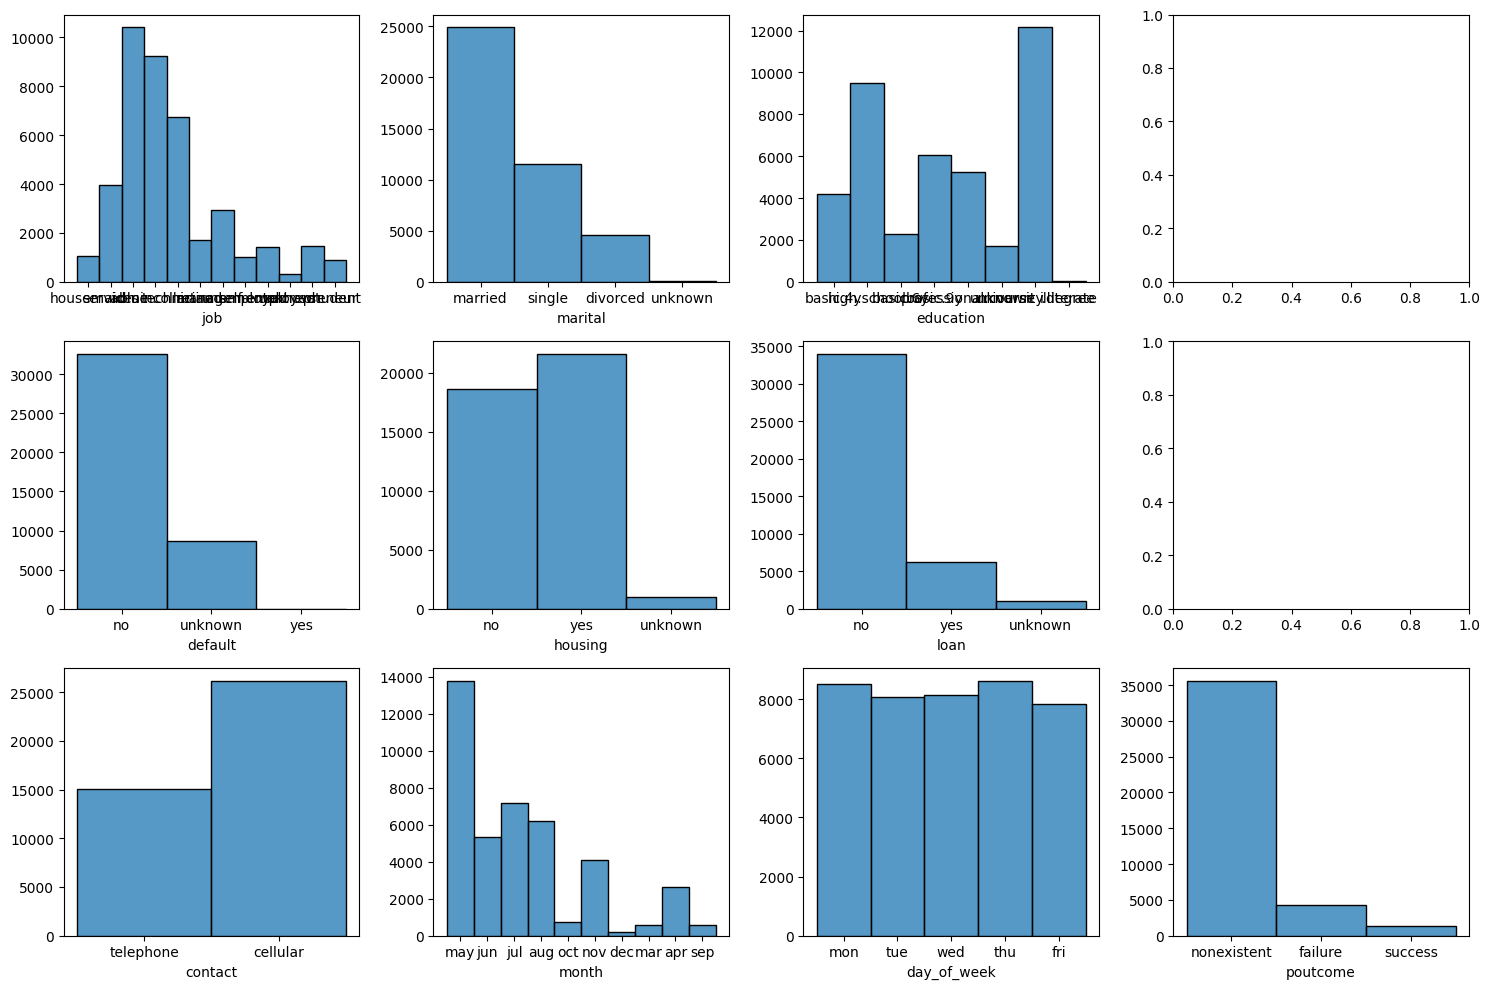

In [78]:
# histogram-plot each categorical variable

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 4, figsize=(15, 10))

# Create a multiple histogram
sns.histplot(ax=axis[0, 0], data=raw_data, x="job").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=raw_data, x="marital").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=raw_data, x="education").set(ylabel=None)

sns.histplot(ax=axis[1, 0], data=raw_data, x="default").set(ylabel=None)
sns.histplot(ax=axis[1, 1], data=raw_data, x="housing").set(ylabel=None)
sns.histplot(ax=axis[1, 2], data=raw_data, x="loan").set(ylabel=None)

sns.histplot(ax=axis[2, 0], data=raw_data, x="contact").set(ylabel=None)
sns.histplot(ax=axis[2, 1], data=raw_data, x="month").set(ylabel=None)
sns.histplot(ax=axis[2, 2], data=raw_data, x="day_of_week").set(ylabel=None)
sns.histplot(ax=axis[2, 3], data=raw_data, x="poutcome").set(ylabel=None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

- seems like no phone campaigning happens in the first couple months of the year
- Most prospective customers were married, not in default, and didn't have a personal loan
- am now realizing that rather than having missing, null, NaN data in various columns, we have some with "unknown" instead.

### numeric variables

Numerical, non-categorical variables in the dataset include: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed

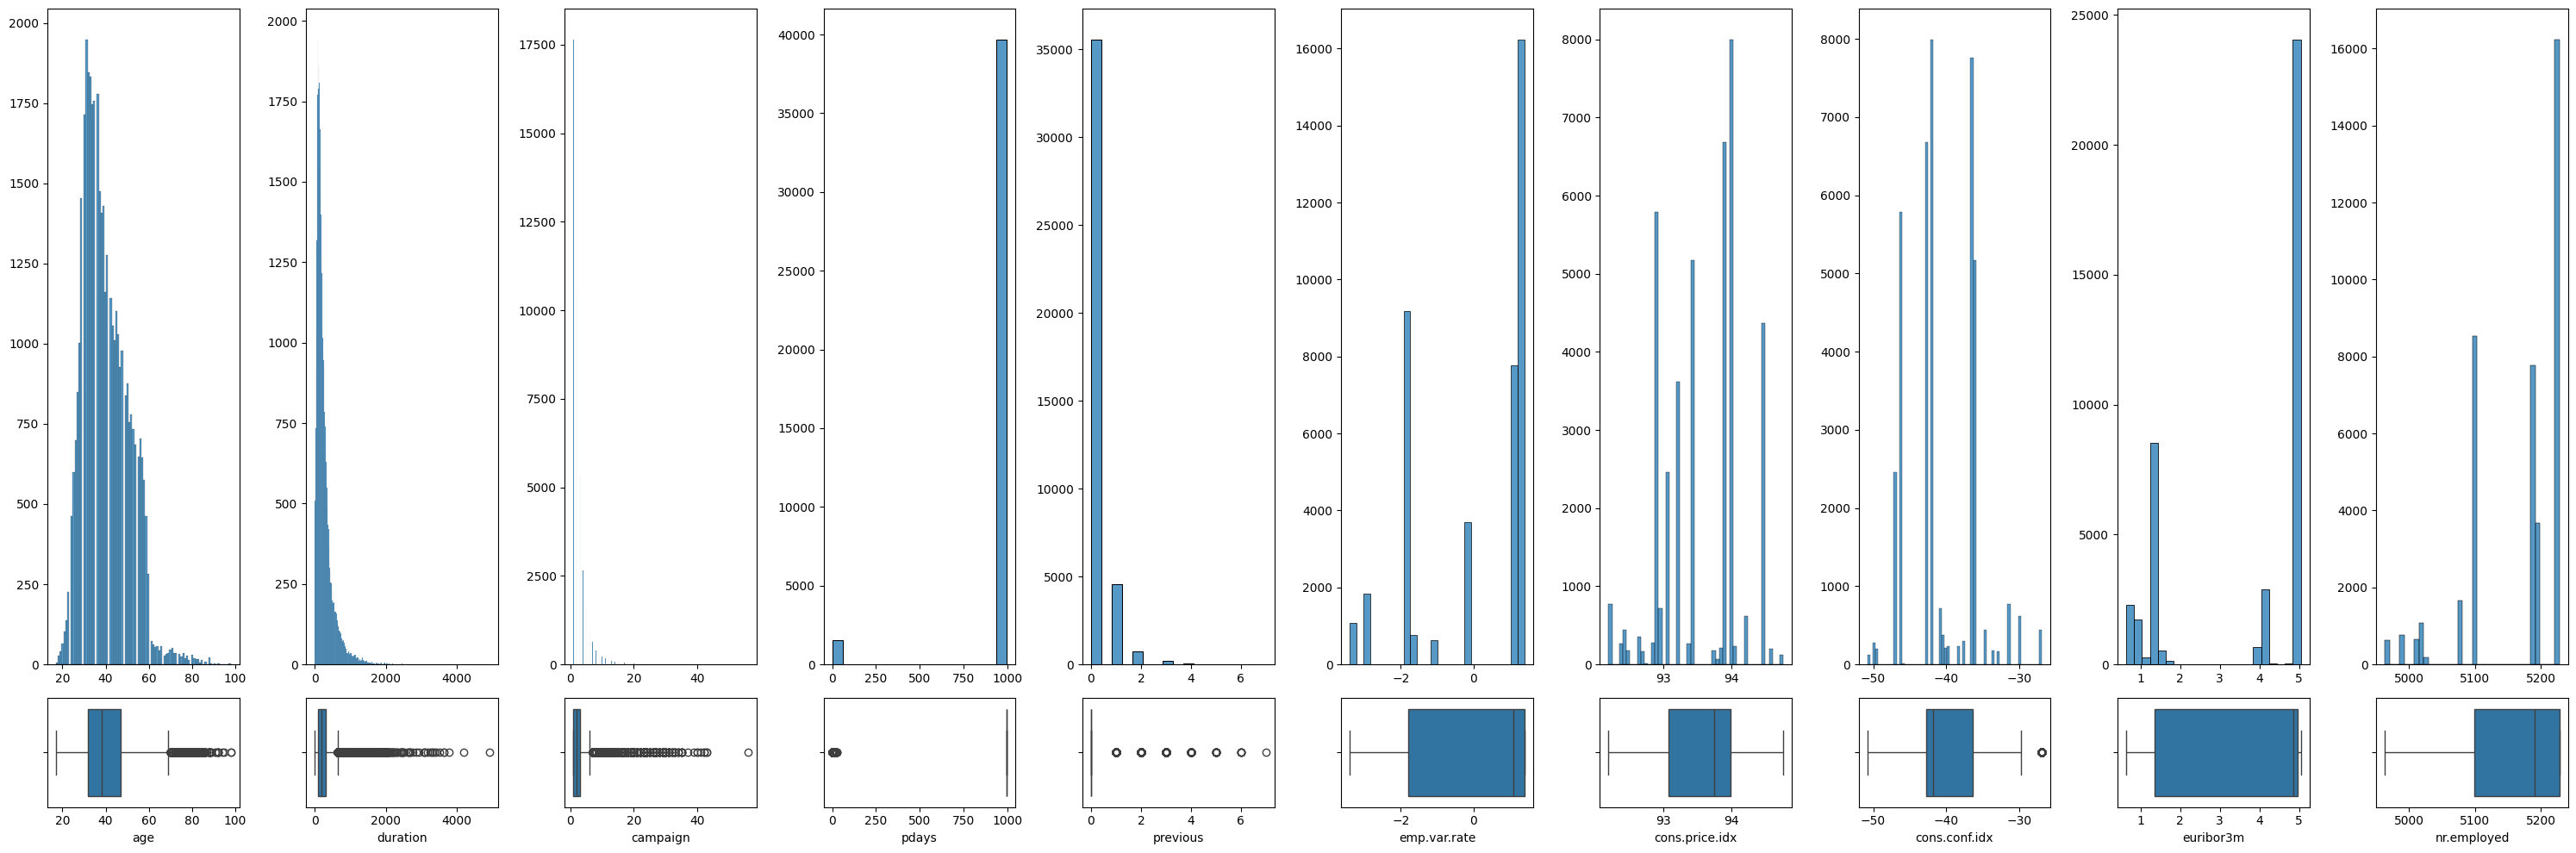

In [79]:
numeric_variables = [
    "age",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed",
]
fig, axis = plt.subplots(
    2, len(numeric_variables), figsize=(30, 10), gridspec_kw={"height_ratios": [6, 1]}
)

# Creating a multiple figure with histograms and box plots
temp_column_index = 0
for each_numeric_variable in numeric_variables:
    sns.histplot(
        ax=axis[0, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    ).set(xlabel=None, ylabel=None)
    sns.boxplot(
        ax=axis[1, temp_column_index], data=raw_data, x=f"{each_numeric_variable}"
    )
    temp_column_index += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

From this it looks like:
- most people were contacted only one or few times in prior campaign, but some outliers look like they were pestered as many as 10, 20, 40 times or more
- Most contacts got off the phone within a few hundred seconds, but a much lesser quantity of calls could last a quarter-hour, half hour, or over an hour. (Will be intresting to see how that corresponds to them having taken out a long-term account).

## Step 4: Analysis of multivariate variables
### Numerical-numerical analysis
Am curious to see whether/how there are correlations between age & how long people stayed on the phone, or age & how many employees they have.


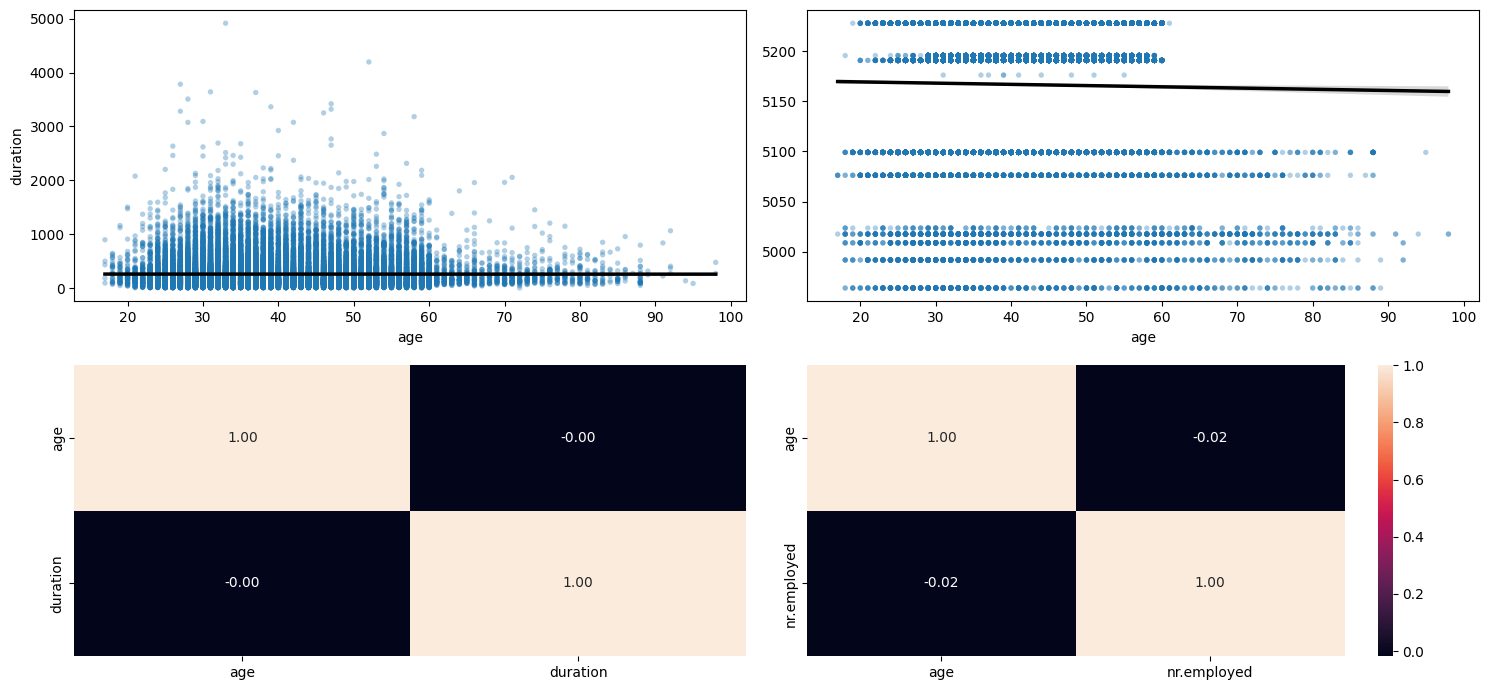

In [80]:
fig, axis = plt.subplots(2, 2, figsize=(15, 7))

# Create a multiple scatter diagram
common_scatter = {"s": 15, "alpha": 0.35, "edgecolor": "none"}
common_line = {"color": "black", "lw": 2.5, "zorder": 5}

sns.regplot(
    ax=axis[0, 0],
    data=raw_data,
    x="age",
    y="duration",
    scatter_kws=common_scatter,
    line_kws=common_line,
)
sns.heatmap(
    raw_data[["age", "duration"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 0],
    cbar=False,
)

sns.regplot(
    ax=axis[0, 1],
    data=raw_data,
    x="age",
    y="nr.employed",
    scatter_kws=common_scatter,
    line_kws=common_line,
).set(ylabel=None)
sns.heatmap(
    raw_data[["age", "nr.employed"]].corr(),
    annot=True,
    fmt=".2f",
    ax=axis[1, 1],
)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Based on this it looks like there's no direct correlation between age and how long a prospect stayed on the phone.
There's a negative correlation (very slight, -0.02) whereby an older prospect has fewer employees, not more, which is opposite what I would've guessed.

### categorical-categorical analysis

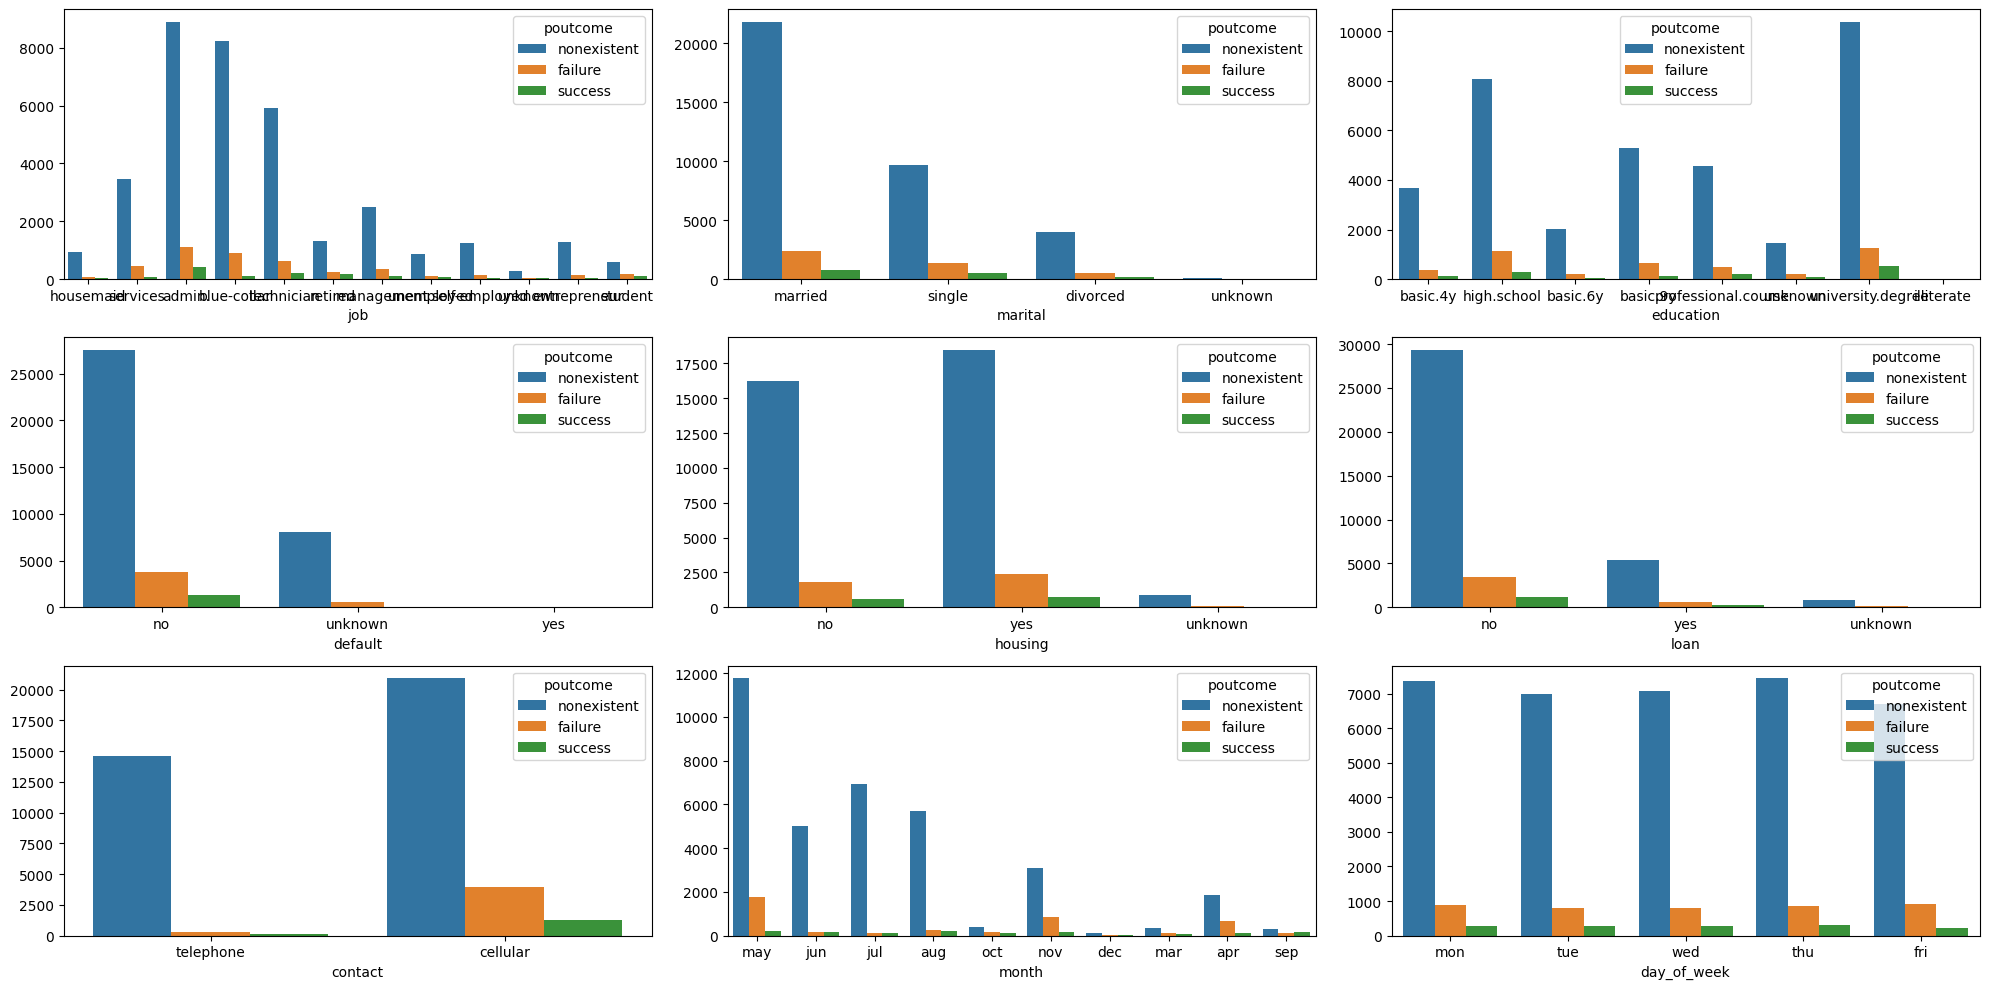

In [ ]:
temp_categorical_variables = (
    categorical_variables.copy()
)  # to avoid wrecking original copy when loop below starts popping them off the front as though a FIFO queue


fig, axis = plt.subplots(3, 3, figsize=(20, 10))



for row in range(3):


    for col in range(3):
        sns.countplot(

            ax=axis[row, col],
            data=raw_data,
            x=temp_categorical_variables[0],
            hue="poutcome",
        ).set(ylabel=None)


        temp_categorical_variables.remove(temp_categorical_variables[0])



plt.tight_layout()

plt.show()

The "nonexistent" data here is so much more prevalent than confirmed failure/success indicators for poutcome that it makes it a bit more challenging for me to assess which of these variables appears to correlate most closely with failure/success.

#### Correlation analysis


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


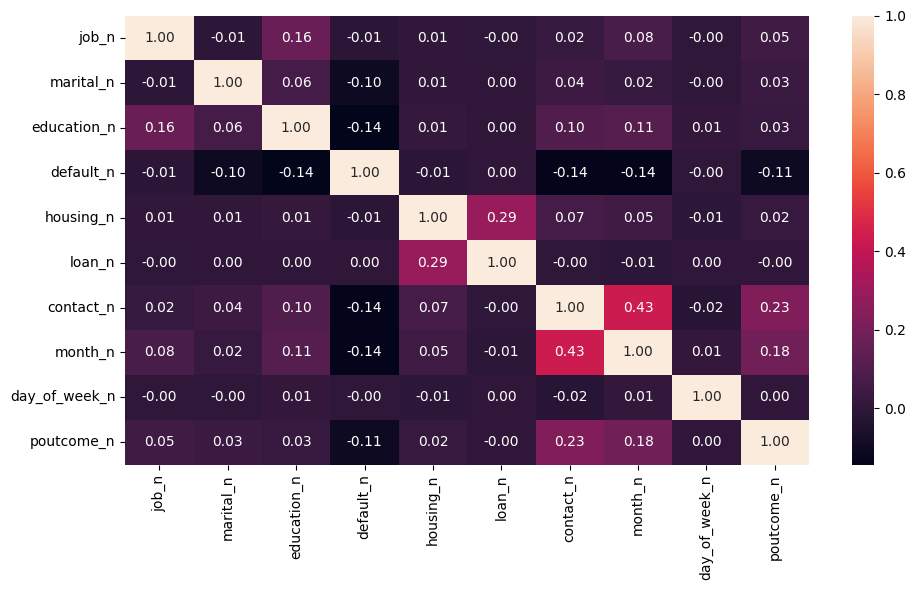

In [82]:
print(categorical_variables)
raw_data["job_n"] = pd.factorize(raw_data["job"])[0]
raw_data["marital_n"] = pd.factorize(raw_data["marital"])[0]
raw_data["education_n"] = pd.factorize(raw_data["education"])[0]
raw_data["default_n"] = pd.factorize(raw_data["default"])[0]
raw_data["housing_n"] = pd.factorize(raw_data["housing"])[0]
raw_data["loan_n"] = pd.factorize(raw_data["loan"])[0]
raw_data["contact_n"] = pd.factorize(raw_data["contact"])[0]
raw_data["month_n"] = pd.factorize(raw_data["month"])[0]
raw_data["day_of_week_n"] = pd.factorize(raw_data["day_of_week"])[0]
raw_data["poutcome_n"] = pd.factorize(raw_data["poutcome"])[0]


fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(
    raw_data[
        [
            "job_n",
            "marital_n",
            "education_n",
            "default_n",
            "housing_n",
            "loan_n",
            "contact_n",
            "month_n",
            "day_of_week_n",
            "poutcome_n",
        ]
    ].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()

plt.show()

Based on the negative-number correlations between default_n and plenty of other variables, seems like unmarried, uneducated people are both less likely to get called and less likely to take out a long-term account.
Looks like the strongest correlation is between the type of contact and when they were last contacted (i.e. I'd expect at least one of the months to have been a major burst of a certain type of contact).
Next strongest correlation is between whether the prospect did or did not simultaneously have both a personal loan and a housing loan; if they had either, they were more likely to have both, and/or if they didn't have either, more likely to have neither.
Based on the relatively-stronger correlations of poutcome and the contact type & month, looks like it'll be worth checking what was tried during certain months to have a greater influence on outcome.

### numerical-categorical analysis

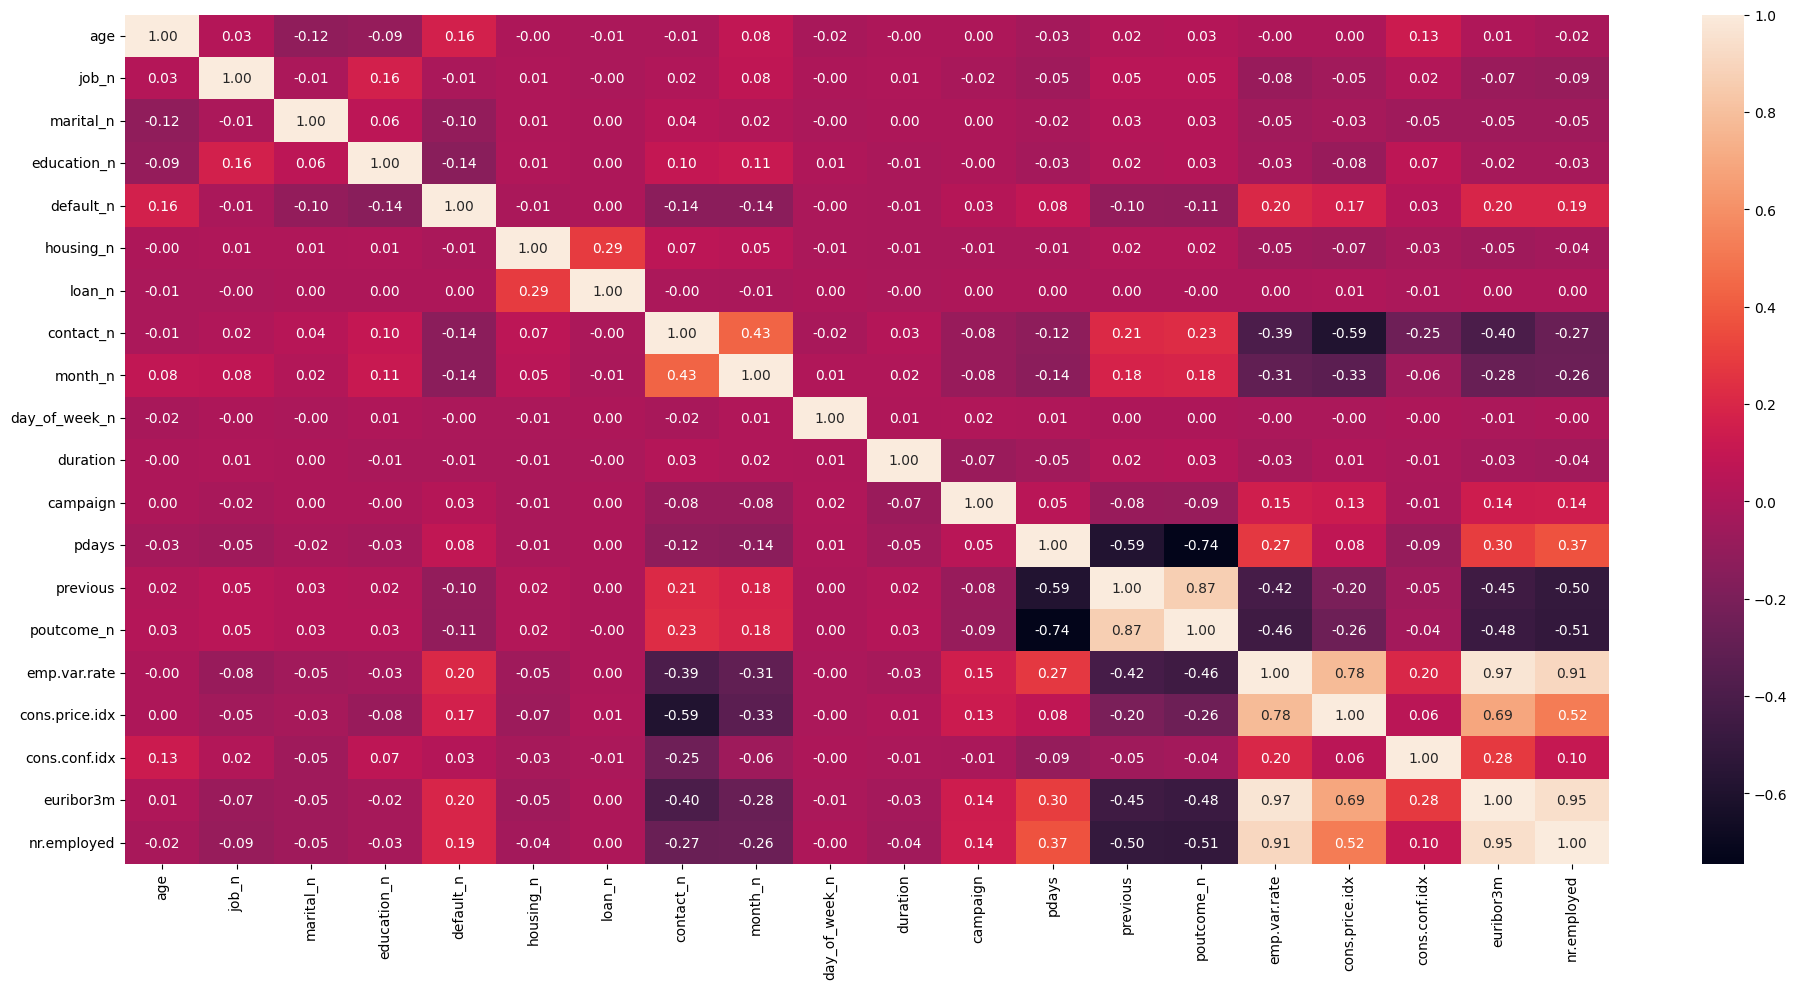

In [83]:
fig, axis = plt.subplots(figsize=(20, 10))

sns.heatmap(
    raw_data[
        [
            "age",
            "job_n",
            "marital_n",
            "education_n",
            "default_n",
            "housing_n",
            "loan_n",
            "contact_n",
            "month_n",
            "day_of_week_n",
            "duration",
            "campaign",
            "pdays",
            "previous",
            "poutcome_n",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed",
        ]
    ].corr(),
    annot=True,
    fmt=".2f",
)

plt.tight_layout()

plt.show()

Based on the above, I'd assess:
- the strongest indicator of outcome is "previous," i.e. how many times the prospect was contacted in a previous campaign.  The second strongest is when & how the prospect was contacted.  Most other factors have much lower or no/negligible correelation.
- There are several unsurprising correlations which aren't directly relevant to the problem we're trying to solve.  For example, consumer confidence index & price index (approximations of macroeconomic activity/health) correlate to how many people the prospect has employed.

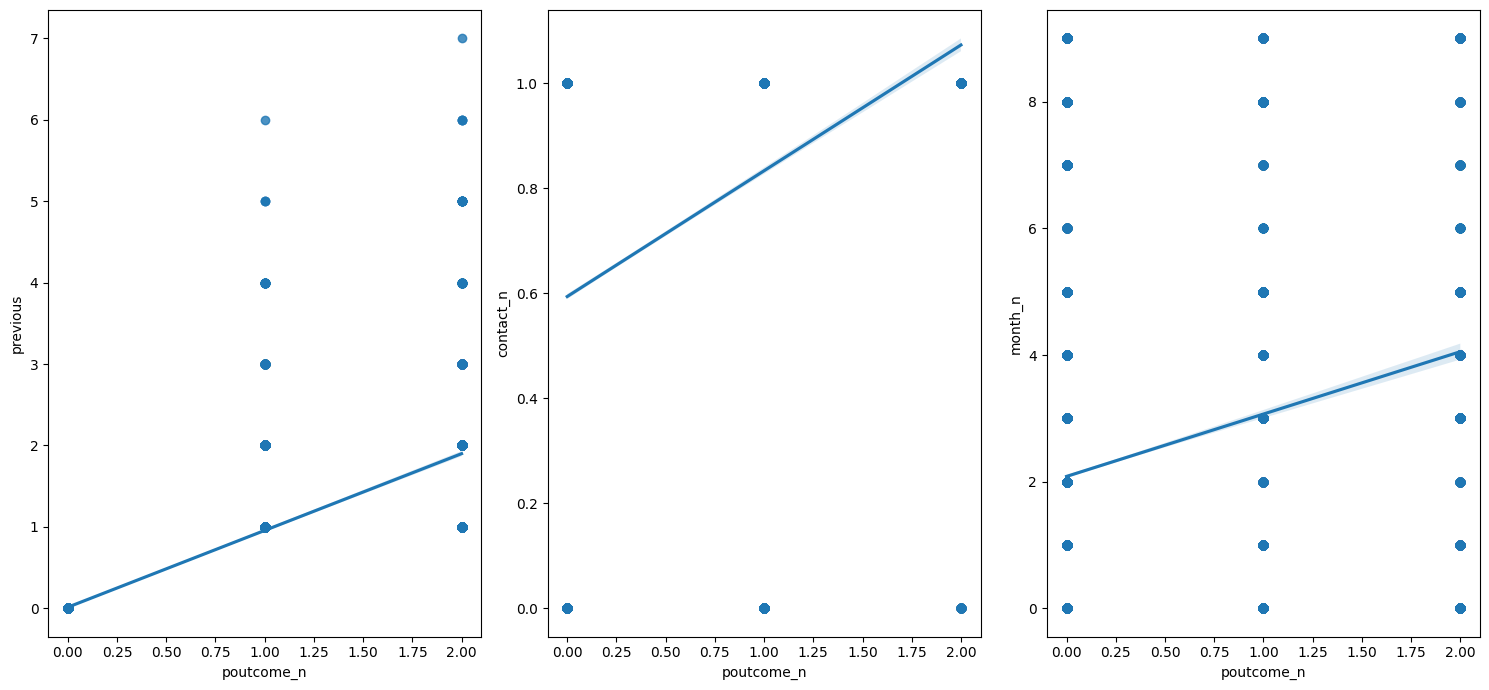

In [84]:
fig, axis = plt.subplots(figsize=(15, 7), ncols=3)

sns.regplot(ax=axis[0], data=raw_data, x="poutcome_n", y="previous")
sns.regplot(ax=axis[1], data=raw_data, x="poutcome_n", y="contact_n")
sns.regplot(ax=axis[2], data=raw_data, x="poutcome_n", y="month_n")

plt.tight_layout()

plt.show()

Based on these regression plots:
- at first glance the visual slope for contact may make it look like the strongest-correlating variable, but the y scales differ across these plots, so actual slope of that one's shorter
- all three correlate to success/failure outcome


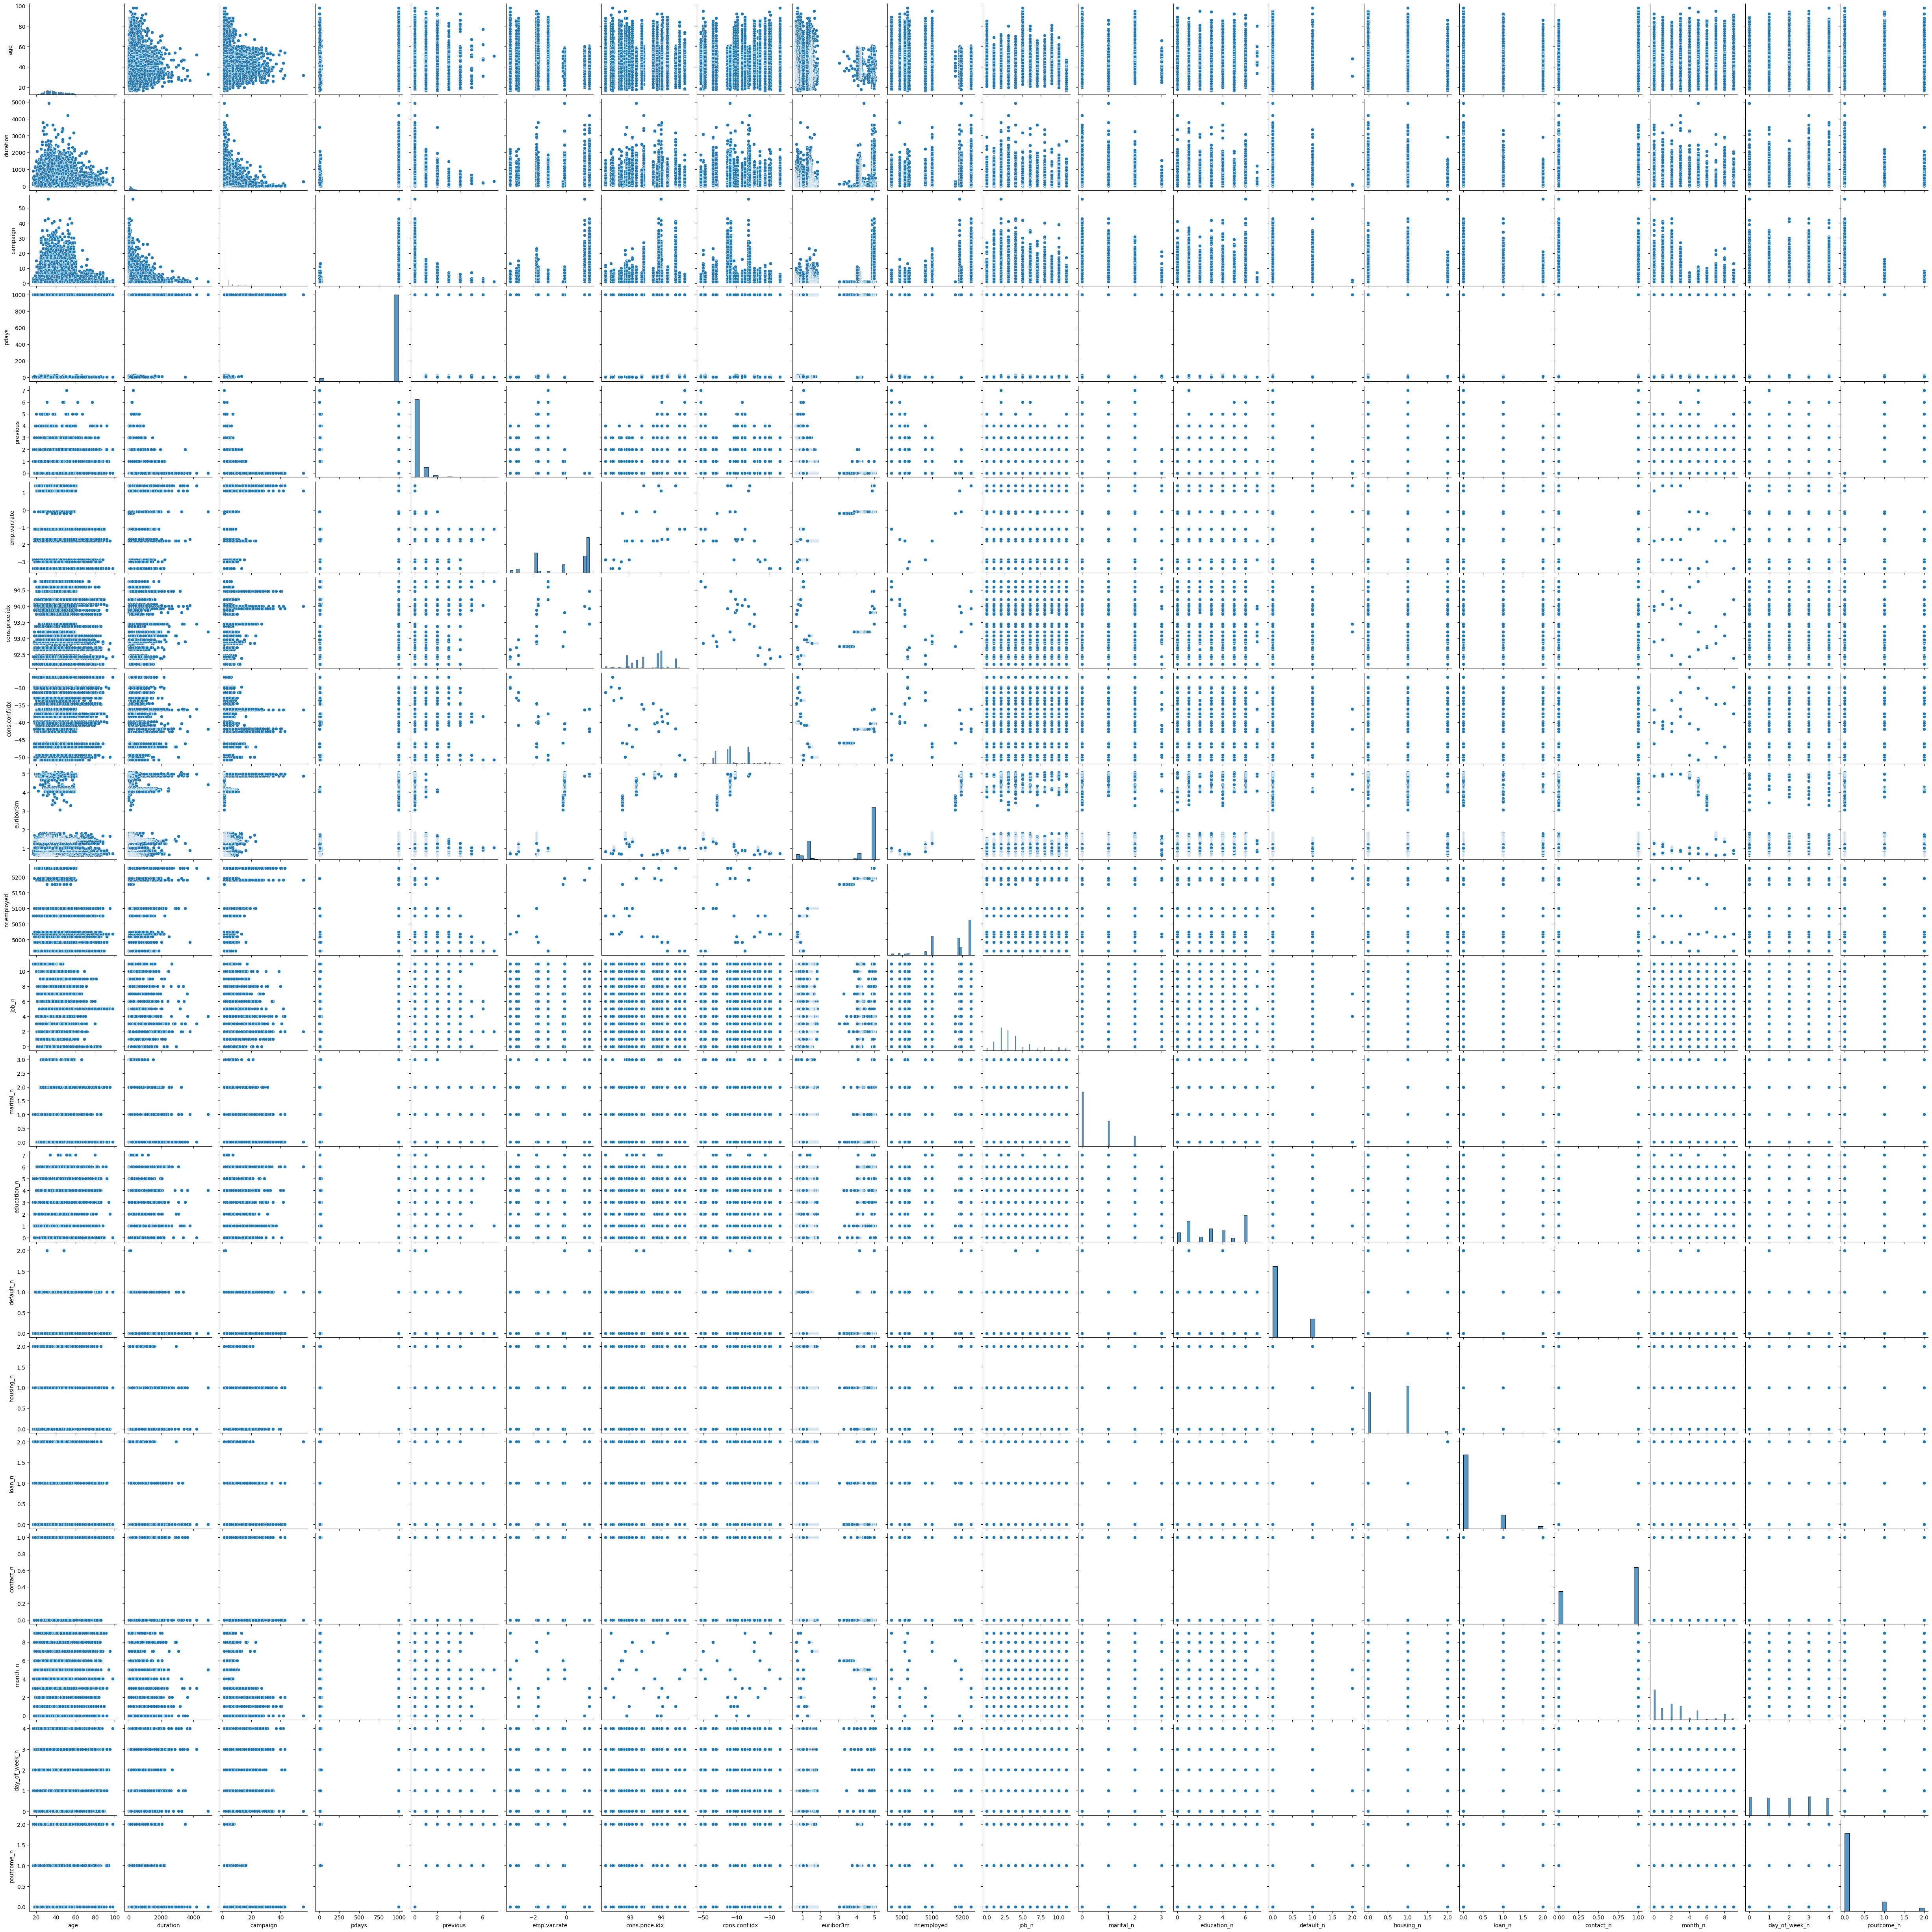

In [85]:
sns.pairplot(data=raw_data)

In [86]:
raw_data.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41176.000000    41176.000000   41176.000000  41176.000000   
mean       0.081922       93.575720     -40.502863      3.621293   
std        1.570883        0.578839       4.627860      1.734437   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed         job_n     marital_n   education_n     default_n  \
count  41176.000000  41176.000000  41176.000000  41176.000000  41176.000000   
mean    5167.034870      3.673863      0.510637      3.277370      0.208908   
std       72.251364      2.454340      0.696794      2.185558      0.406713   
min     4963.600000      0.000000      0.000000      0.000000      0.000000   
25%     5099.100000      2.000000      0.000000      1.000000      0.000000   
50%     5191.000000      3.000000      0.000000      3.000000      0.000000   
75%     5228.100000      4.000000      1.000000      6.000000      0.000000   
max     5228.100000     11.000000      3.000000      7.000000      2.000000   

          housing_n        loan_n     contact_n       month_n  day_of_week_n  \
count  41176.000000  41176.000000  41176.000000  41176.000000   41176.000000   
mean       0.571959      0.199825      0.634714      2.249951       1.979600   
std        0.541216      0.456055      0.481516      2.429157       1.411539   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000       1.000000   
50%        1.000000      0.000000      1.000000      2.000000       2.000000   
75%        1.000000      0.000000      1.000000      3.000000       3.000000   
max        2.000000      2.000000      1.000000      9.000000       4.000000   

         poutcome_n  
count  41176.000000  
mean       0.169953  
std        0.455811  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        2.000000

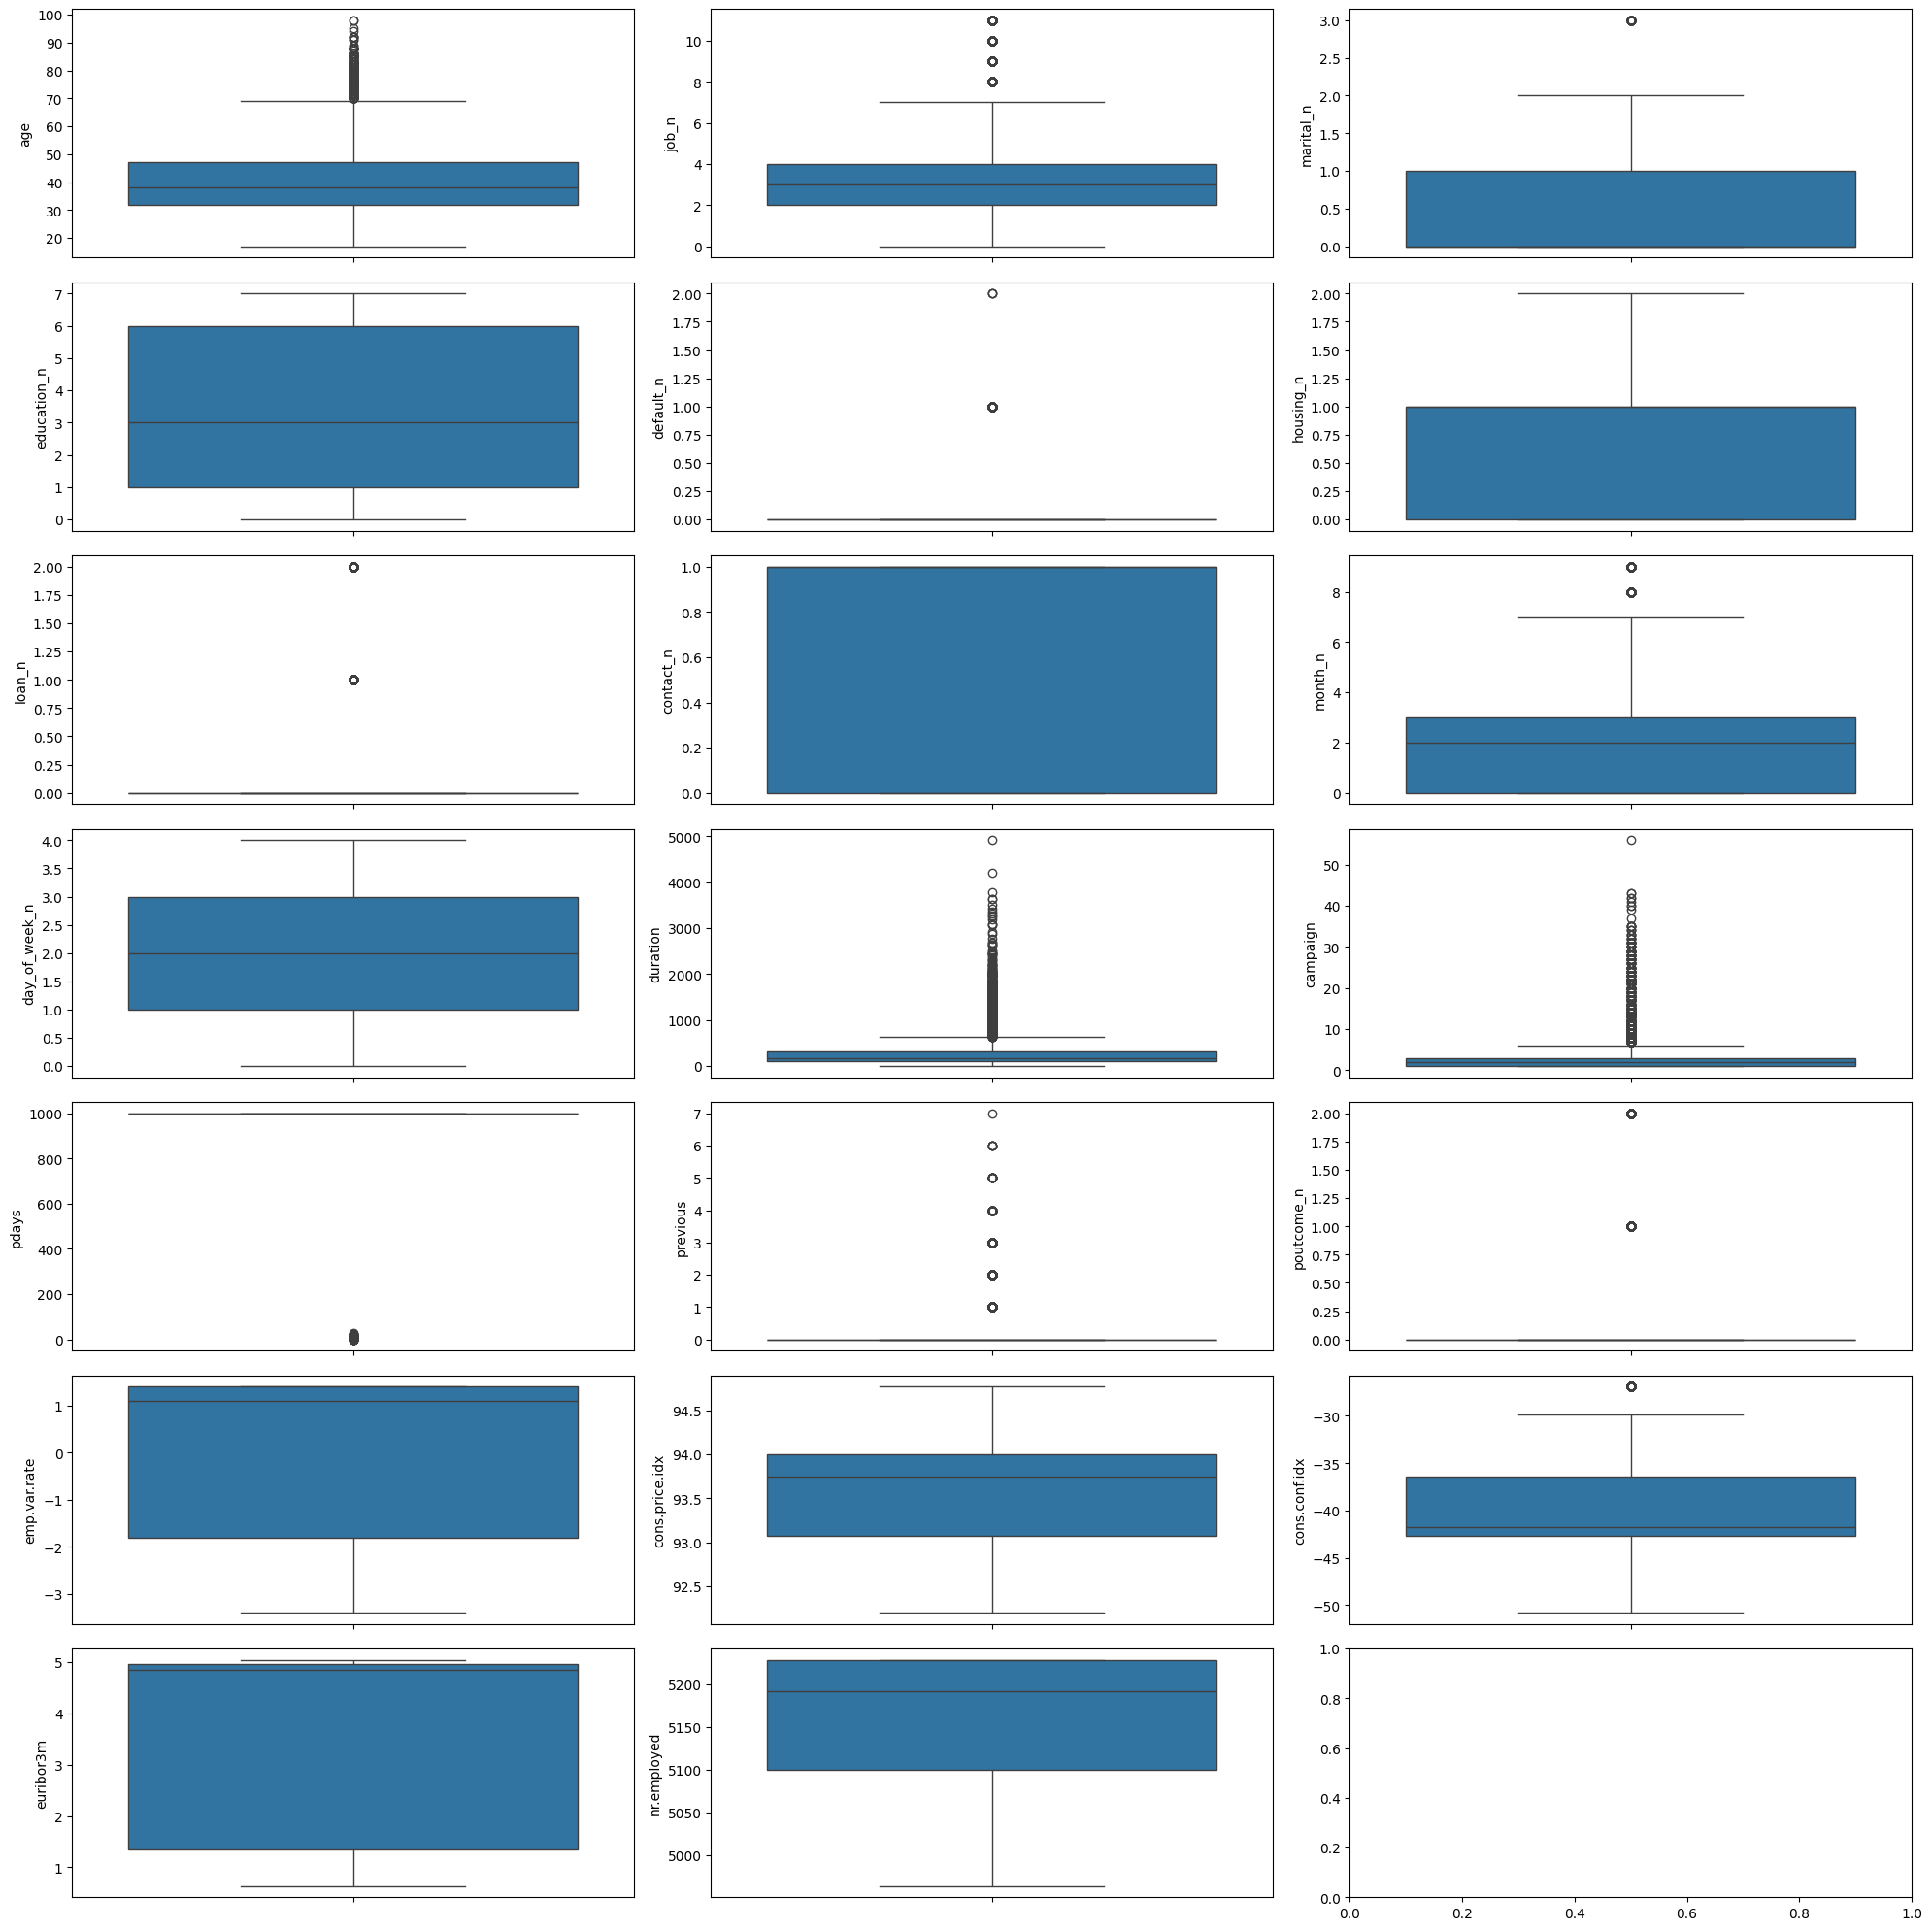

In [87]:
fig, axis = plt.subplots(7, 3, figsize=(20, 20))

sns.boxplot(ax=axis[0, 0], data=raw_data, y="age")
sns.boxplot(ax=axis[0, 1], data=raw_data, y="job_n")
sns.boxplot(ax=axis[0, 2], data=raw_data, y="marital_n")
sns.boxplot(ax=axis[1, 0], data=raw_data, y="education_n")
sns.boxplot(ax=axis[1, 1], data=raw_data, y="default_n")
sns.boxplot(ax=axis[1, 2], data=raw_data, y="housing_n")
sns.boxplot(ax=axis[2, 0], data=raw_data, y="loan_n")
sns.boxplot(ax=axis[2, 1], data=raw_data, y="contact_n")
sns.boxplot(ax=axis[2, 2], data=raw_data, y="month_n")
sns.boxplot(ax=axis[3, 0], data=raw_data, y="day_of_week_n")
sns.boxplot(ax=axis[3, 1], data=raw_data, y="duration")
sns.boxplot(ax=axis[3, 2], data=raw_data, y="campaign")
sns.boxplot(ax=axis[4, 0], data=raw_data, y="pdays")
sns.boxplot(ax=axis[4, 1], data=raw_data, y="previous")
sns.boxplot(ax=axis[4, 2], data=raw_data, y="poutcome_n")
sns.boxplot(ax=axis[5, 0], data=raw_data, y="emp.var.rate")
sns.boxplot(ax=axis[5, 1], data=raw_data, y="cons.price.idx")
sns.boxplot(ax=axis[5, 2], data=raw_data, y="cons.conf.idx")
sns.boxplot(ax=axis[6, 0], data=raw_data, y="euribor3m")
sns.boxplot(ax=axis[6, 1], data=raw_data, y="nr.employed")

plt.tight_layout()

plt.show()

Items affected by outliers: age, job type, marital status, whether prospect is in default or has a personal loan, last month in which they've been contacted, length of call if over 500 seconds long, number of contacts in prior campaign (anything > around 5 is shown as an outlier), Number of days since alst contact, and consumer confidence index.

Maintain-eliminate-replace decisions: Age has enough data points listed in outliers that I wonder whether a separate analysis could be run for lower-aged vs. retiree-aged prospects.  Marital status outlier corresponds to divorcees, but this seems common enough (roughly 11%) that I'd keep it.  Consumer confidence index outlier seems isolated enough to drop.  Number of days since last contact has a clustered bit marked as an outlier but I remember that being charted as one of the most-relevant-seeming variables, so I wonder whether that cluster's important to keep.  Poutcome charted circles for "outliers" actually seem like the success/failure indicators we need as data to learn from, so am wondering whether I should've already separated out the "nonexistent" outcomes earlier in data cleaning (i.e. is nonexistint a synonym for Null / NaN or does it indicate a prospect has neither requeted nor rejected offers for services yet?)

In [88]:
print(raw_data["cons.conf.idx"].describe())
outlier_threshold = -30  # picked approximately 80th percentile
atypical_cons_conf_idx = raw_data.query("`cons.conf.idx` > @outlier_threshold")
print(atypical_cons_conf_idx)
raw_data = raw_data.query(
    f"`cons.conf.idx` <= {outlier_threshold}"
)  # to drop the outlier rows

count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64
       age           job   marital          education  default housing loan  \
37887   53        admin.   married  university.degree  unknown     yes   no   
37888   32        admin.    single  university.degree       no     yes  yes   
37889   52        admin.   married            unknown       no      no   no   
37890   39  entrepreneur   married           basic.6y       no     yes   no   
37891   32        admin.    single  university.degree       no     yes   no   
...    ...           ...       ...                ...      ...     ...  ...   
38596   69       retired   married           basic.4y       no     yes  yes   
38597   18       student    single           basic.6y       no      no  yes   
38598   59       retired  divorced           basic.4y       no     yes   no  

In [89]:
print(raw_data["campaign"].describe())
outlier_threshold = 50
atypical_campaign_value = raw_data.query(f"campaign > {outlier_threshold}")
print(atypical_campaign_value)
raw_data = raw_data.query(
    f"campaign <= {outlier_threshold}"
)  # to drop the outlier rows

count    40463.000000
mean         2.585275
std          2.788171
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
      age     job  marital          education  default  housing     loan  \
4107   32  admin.  married  university.degree  unknown  unknown  unknown   

        contact month day_of_week  ...  job_n  marital_n  education_n  \
4107  telephone   may         mon  ...      2          0            6   

      default_n housing_n  loan_n  contact_n  month_n  day_of_week_n  \
4107          1         2       2          0        0              0   

      poutcome_n  
4107           0  

[1 rows x 31 columns]


In [90]:
print(raw_data["duration"].describe())
outlier_threshold = 4000
atypical_duration = raw_data.query(f"duration > {outlier_threshold}")
print(atypical_duration)
raw_data = raw_data.query(
    f"duration <= {outlier_threshold}"
)  # to drop the outlier rows

count    40462.000000
mean       257.923558
std        259.102564
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
       age          job  marital            education default housing loan  \
22192   52  blue-collar  married             basic.4y      no      no   no   
24091   33   technician   single  professional.course      no     yes   no   

         contact month day_of_week  ...  job_n  marital_n  education_n  \
22192  telephone   aug         thu  ...      3          0            0   
24091  telephone   nov         mon  ...      4          1            4   

       default_n housing_n  loan_n  contact_n  month_n  day_of_week_n  \
22192          0         0       0          0        3              3   
24091          0         1       0          0        5              0   

       poutcome_n  
22192           0  
24091           0  

[2 rows x 31 columns]


### Building logistic regression model

#### Feature scaling
##### Splitting training vs test data

In [91]:
from sklearn.model_selection import train_test_split

num_variables = [
    "age",
    "job_n",
    "marital_n",
    "education_n",
    "default_n",
    "housing_n",
    "loan_n",
    "contact_n",
    "month_n",
    "day_of_week_n",
    "duration",
    "campaign",
    "pdays",
    "previous",
    "emp.var.rate",
    "cons.price.idx",
    "cons.conf.idx",
    "euribor3m",
    "nr.employed",
]


# We divide the dataset into training and test samples
X = raw_data.drop("poutcome_n", axis=1)[num_variables]
y = raw_data["poutcome_n"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()

age  job_n  marital_n  education_n  default_n  housing_n  loan_n  \
32140   38      2          0            1          0          1       0   
38791   66      5          0            0          0          1       1   
29839   34      2          0            3          0          1       0   
6201    50      1          0            2          0          0       0   
25293   41      4          1            4          1          1       0   

       contact_n  month_n  day_of_week_n  duration  campaign  pdays  previous  \
32140          1        0              4       213         5    999         0   
38791          0        5              3      1127         1    999         0   
29839          1        8              0       401         2    999         0   
6201           0        0              1       377         1    999         0   
25293          1        5              1        68         2      4         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
32140          -1.8          92.893          -46.2      1.313       5099.1  
38791          -3.4          92.649          -30.1      0.714       5017.5  
29839          -1.8          93.075          -47.1      1.405       5099.1  
6201            1.1          93.994          -36.4      4.857       5191.0  
25293          -0.1          93.200          -42.0      4.153       5195.8

In [92]:
# normalization scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

X_train_norm.head()

age     job_n  marital_n  education_n  default_n  housing_n  \
32140 -0.184978 -0.679144  -0.738824    -1.043982  -0.516863   0.796144   
38791  2.551921  0.549525  -0.738824    -1.502403  -0.516863   0.796144   
29839 -0.575963 -0.679144  -0.738824    -0.127139  -0.516863   0.796144   
6201   0.987979 -1.088700  -0.738824    -0.585561  -0.516863  -1.055652   
25293  0.108261  0.139969   0.689831     0.331282   1.933315   0.796144   

         loan_n  contact_n   month_n  day_of_week_n  duration  campaign  \
32140 -0.439289   0.763253 -0.922330       1.432698 -0.173323  0.868251   
38791  1.762802  -1.310182  1.176781       0.725655  3.401828 -0.569087   
29839 -0.439289   0.763253  2.436248      -1.395476  0.562048 -0.209752   
6201  -0.439289  -1.310182 -0.922330      -0.688433  0.468171 -0.569087   
25293 -0.439289   0.763253  1.176781      -0.688433 -0.740496 -0.209752   

          pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
32140  0.187119 -0.340099     -1.287543       -1.252000      -1.257623   
38791  0.187119 -0.340099     -2.345618       -1.686068       2.441139   
29839  0.187119 -0.340099     -1.287543       -0.928228      -1.464386   
6201   0.187119 -0.340099      0.630218        0.706643       0.993798   
25293 -5.355859  1.701126     -0.163338       -0.705857      -0.292728   

       euribor3m  nr.employed  
32140  -1.385809    -1.009614  
38791  -1.737106    -2.173948  
29839  -1.331854    -1.009614  
6201    0.692650     0.301688  
25293   0.279773     0.370178

In [93]:
# min-max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index=X_train.index, columns=num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index=X_test.index, columns=num_variables)

X_train_scal.head()

age     job_n  marital_n  education_n  default_n  housing_n  \
32140  0.269231  0.181818   0.000000     0.142857        0.0        0.5   
38791  0.628205  0.454545   0.000000     0.000000        0.0        0.5   
29839  0.217949  0.181818   0.000000     0.428571        0.0        0.5   
6201   0.423077  0.090909   0.000000     0.285714        0.0        0.0   
25293  0.307692  0.363636   0.333333     0.571429        0.5        0.5   

       loan_n  contact_n   month_n  day_of_week_n  duration  campaign  \
32140     0.0        1.0  0.000000           1.00  0.056275  0.095238   
38791     0.5        0.0  0.555556           0.75  0.297754  0.000000   
29839     0.0        1.0  0.888889           0.00  0.105945  0.023810   
6201      0.0        0.0  0.000000           0.25  0.099604  0.000000   
25293     0.0        1.0  0.555556           0.25  0.017966  0.023810   

          pdays  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
32140  1.000000  0.000000      0.333333        0.269680       0.222222   
38791  1.000000  0.000000      0.000000        0.174591       1.000000   
29839  1.000000  0.000000      0.333333        0.340608       0.178744   
6201   1.000000  0.000000      0.937500        0.698753       0.695652   
25293  0.004004  0.142857      0.687500        0.389322       0.425121   

       euribor3m  nr.employed  
32140   0.153933     0.512287  
38791   0.018136     0.203781  
29839   0.174790     0.512287  
6201    0.957379     0.859735  
25293   0.797778     0.877883

In [94]:
# feature selection for selecting most-relevant features to use for building ML model

from sklearn.feature_selection import f_classif, SelectKBest

# With a value of k = 16 we implicitly mean that we want to remove 4 features from the 20-column dataset
selection_model = SelectKBest(f_classif, k=16)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(
    selection_model.transform(X_train), columns=X_train.columns.values[ix]
)
X_test_sel = pd.DataFrame(
    selection_model.transform(X_test), columns=X_test.columns.values[ix]
)

X_train_sel.head()

age  job_n  marital_n  education_n  default_n  contact_n  month_n  \
0  38.0    2.0        0.0          1.0        0.0        1.0      0.0   
1  66.0    5.0        0.0          0.0        0.0        0.0      5.0   
2  34.0    2.0        0.0          3.0        0.0        1.0      8.0   
3  50.0    1.0        0.0          2.0        0.0        0.0      0.0   
4  41.0    4.0        1.0          4.0        1.0        1.0      5.0   

   duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0     213.0       5.0  999.0       0.0          -1.8          92.893   
1    1127.0       1.0  999.0       0.0          -3.4          92.649   
2     401.0       2.0  999.0       0.0          -1.8          93.075   
3     377.0       1.0  999.0       0.0           1.1          93.994   
4      68.0       2.0    4.0       1.0          -0.1          93.200   

   cons.conf.idx  euribor3m  nr.employed  
0          -46.2      1.313       5099.1  
1          -30.1      0.714       5017.5  
2          -47.1      1.405       5099.1  
3          -36.4      4.857       5191.0  
4          -42.0      4.153       5195.8

In [99]:
X_train_sel["poutcome_n"] = list(y_train)
X_test_sel["poutcome_n"] = list(y_test)

In [100]:
X_train_sel.to_csv(
    "../data/interim/clean_banking_marketing_campaign.csv",
    index=False,
)
X_test_sel.to_csv("../data/interim/clean_banking_marketing_campaign.csv", index=False)

In [101]:
import pandas as pd

train_data = pd.read_csv("../data/interim/clean_banking_marketing_campaign.csv")
test_data = pd.read_csv("../data/interim/clean_banking_marketing_campaign.csv")

train_data.head()

age  job_n  marital_n  education_n  default_n  contact_n  month_n  \
0  50.0    3.0        0.0          0.0        0.0        1.0      0.0   
1  30.0    6.0        1.0          1.0        0.0        1.0      0.0   
2  50.0    3.0        0.0          0.0        1.0        0.0      0.0   
3  59.0    1.0        0.0          1.0        0.0        1.0      8.0   
4  41.0    4.0        0.0          4.0        0.0        1.0      8.0   

   duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0     197.0       2.0  999.0       0.0          -1.8          92.893   
1     402.0       2.0  999.0       0.0          -1.8          92.893   
2     100.0       1.0  999.0       0.0           1.1          93.994   
3     542.0       3.0  999.0       1.0          -1.8          93.075   
4     466.0       5.0  999.0       1.0          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed  price  poutcome_n  
0          -46.2      1.299       5099.1      0           0  
1          -46.2      1.334       5099.1      0           0  
2          -36.4      4.856       5191.0      0           0  
3          -47.1      1.453       5099.1      1           1  
4          -47.1      1.423       5099.1      1           1

In [116]:
X_train = train_data.drop(["poutcome_n"], axis=1)
y_train = train_data["poutcome_n"]
X_test = test_data.drop(["poutcome_n"], axis=1)
y_test = test_data["poutcome_n"]

In [117]:
from sklearn.linear_model import LogisticRegression

model_using_plain_default_hyperparams = LogisticRegression()
model_using_plain_default_hyperparams.fit(X_train, y_train)

c:\Users\Nick\git\logistic-regression-project-tutorial-NWinocur\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [118]:
y_pred = model_using_plain_default_hyperparams.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(8092,))

#### Accuracy score without hyperparameter optimization

In [119]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8947108255066732

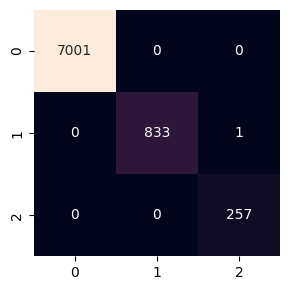

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

bank_marketing_co_matr = confusion_matrix(y_test, y_pred)

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(bank_marketing_co_matr)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.show()

In [127]:
model_using_higher_max_iterations = LogisticRegression(max_iter=100000)
model_using_higher_max_iterations.fit(X_train, y_train)
y_pred = model_using_higher_max_iterations.predict(X_test)
y_pred
accuracy_score(y_test, y_pred)

0.999876421156698

Three-nines accuracy in less than 25 seconds of processing time made this better in terms of both accuracy and computational intensity vs. just jumping straight to trying hyperparameter tuning on an otherwise-default model.

#### Hyperparameter optimizing
##### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

# We initialize the grid
grid = GridSearchCV(
    model_using_plain_default_hyperparams, hyperparams, scoring="accuracy", cv=5
)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [122]:
def warn(*args, **kwargs):
    pass


import warnings

warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}


In [123]:
model_grid = LogisticRegression(penalty="l1", C=10, solver="liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9962926347009392

Two-nines accuracy is substantially better than sub-90, and is better than random search finds in cells below.  But needing to take about 3 minutes 43 seconds to get it seems not worthwhile to me vs. just upping the max iterations on the plain model enough to get three nines in less time.

##### Random search hyperparameter optimization-hunting

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}

# We initialize the random search
random_search = RandomizedSearchCV(
    model_using_plain_default_hyperparams,
    hyperparams,
    n_iter=100,
    scoring="accuracy",
    cv=5,
    random_state=42,
)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [125]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

c:\Users\Nick\git\logistic-regression-project-tutorial-NWinocur\.venv\Lib\site-packages\scipy\optimize\_linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
c:\Users\Nick\git\logistic-regression-project-tutorial-NWinocur\.venv\Lib\site-packages\sklearn\utils\optimize.py:100: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


Best hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': np.float64(10000.0)}


In [126]:
model_random_search = LogisticRegression(penalty="l2", C=29.7635, solver="lbfgs")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8952051408798813

89.52% accuracy is better than 89.47%, barely, but still not as good as either upping max iteration on an otherwise-default model, or the hyperparameters found by grid search above.